# Introduction

This notebook presents the results of a series of statistical experiments on travel insurance purchase. The experiments were designed to identify the most important factors that influence customers to purchase travel insurance and to develop a model that can predict which customers are likely to buy it.

### The notebook is divided into three parts:

* Exploratory data analysis (EDA): This section analyzes the features of the dataset and identifies any relationships or trends.
* Feature engineering: This section adds new features to the dataset and converts features into a suitable form for modeling.
* Predictive modeling: This section evaluates the performance of several machine learning models in predicting travel insurance purchase.
* The notebook concludes with a discussion of the findings and their implications for tour and travel companies.

# Importing data and libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm
from sklearn.svm import SVR
from scipy.stats import t
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    RandomForestClassifier,
)

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    cross_val_predict,
)
from scipy.stats import linregress
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, BayesianRidge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    mean_absolute_error,
    confusion_matrix,
    make_scorer,
    recall_score,
    precision_score,
)
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from tpot import TPOTClassifier
import analysis_functions

# importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm  # support vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics  # accuracy measure
from sklearn.ensemble import (
    BaggingClassifier,
    VotingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.preprocessing import StandardScaler
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.svm import SVC


sns.set_palette("colorblind")
warnings.filterwarnings("ignore")

%load_ext nb_black
%matplotlib inline

C:\Users\artur\anaconda3\envs\Data_sciencee\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


<IPython.core.display.Javascript object>

In [2]:
insurance_data = pd.read_csv("TravelInsurancePrediction.csv", index_col=None)

<IPython.core.display.Javascript object>

In [3]:
insurance_data.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<IPython.core.display.Javascript object>

In [4]:
insurance_data = insurance_data.drop("Unnamed: 0", axis=1)

<IPython.core.display.Javascript object>

In [5]:
insurance_data.shape

(1987, 9)

<IPython.core.display.Javascript object>

In [6]:
print(
    f"In insurance table there are {insurance_data.shape[0]} records and {insurance_data.shape[1]} features in a insurance data table"
)

In insurance table there are 1987 records and 9 features in a insurance data table


<IPython.core.display.Javascript object>

In [7]:
insurance_data.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


<IPython.core.display.Javascript object>

### Content
* Age- Age Of The Customer
* Employment Type- The Sector In Which Customer Is Employed
* GraduateOrNot- Whether The Customer Is College Graduate Or Not
* AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
* FamilyMembers- Number Of Members In Customer's Family
* ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 * Years[2017-2019].
* EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
* TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019. 

# Types Of Features
## Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

### Categorical Features in the dataset: Employment Type, GraduateOrNot, ChronicDiseases, FrequentFlyer, EverTravelledAbroad, TravelInsurance .

## Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

### Ordinal Features in the dataset: FamilyMembers.

## Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

### Continous Features in the dataset: Age, AnnualIncome.

Later we will analyze these features , one by one.

### Before going to analysis let's fix little bit our dataset, so it will be more understandable 

In [9]:
bool_columns = ["TravelInsurance", "ChronicDiseases"]

# Encode non-numeric columns with dummy variables
insurance_data[bool_columns] = insurance_data[bool_columns].astype(bool)

<IPython.core.display.Javascript object>

# Analysis of the features

* We will start our Exploratory data analysis from out target variable "Travel insurance"
* After that, Analysis of categorical variables
* Ordinal features
* Continious features

# First of all, let's look at our target variable

## How many customers got travel insurance?

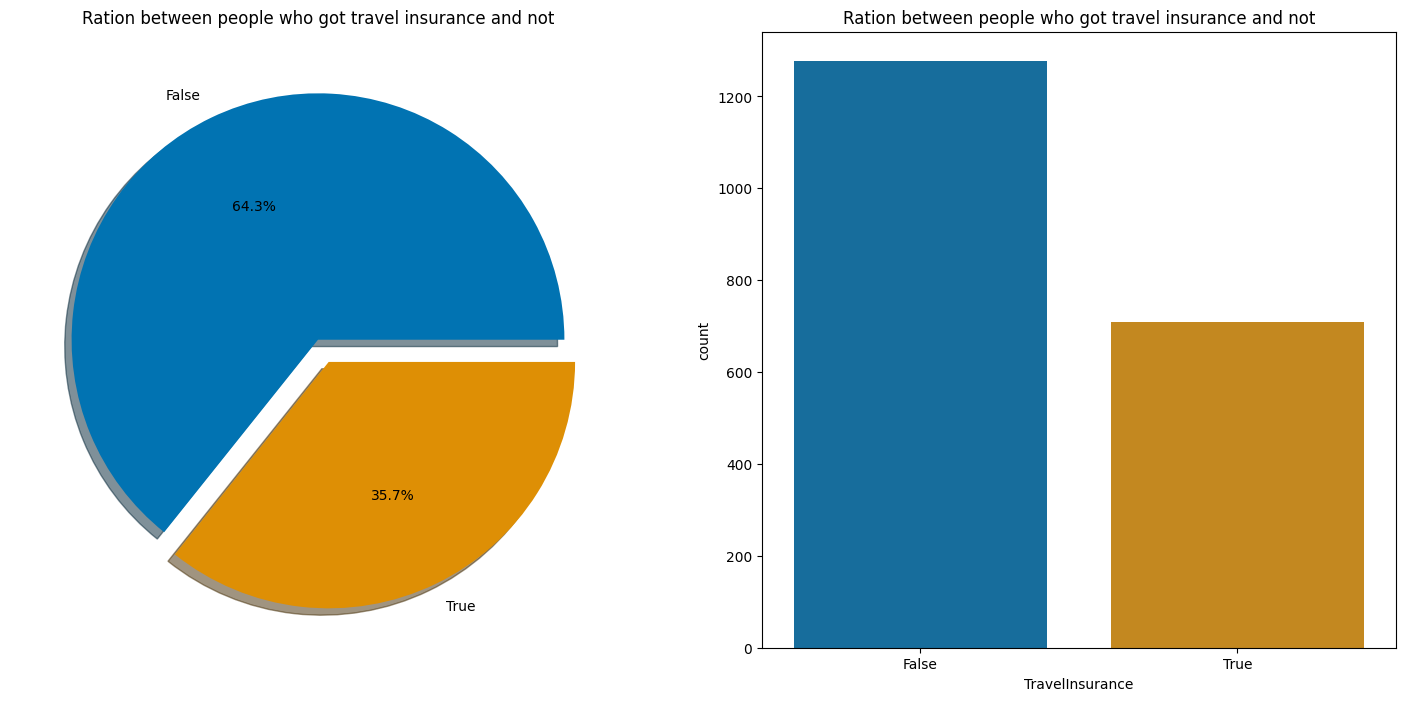

<IPython.core.display.Javascript object>

In [10]:
analysis_functions.pie_count_subplot_single(
    insurance_data["TravelInsurance"],
    title="Ration between people who got travel insurance and not",
)

35.7% of people has travel insurance. Much less than people who hasn't travel insurance

## Exploration of categorical features 

## How many respondents have Chronic  Diseases and travel insurance buying between these groups

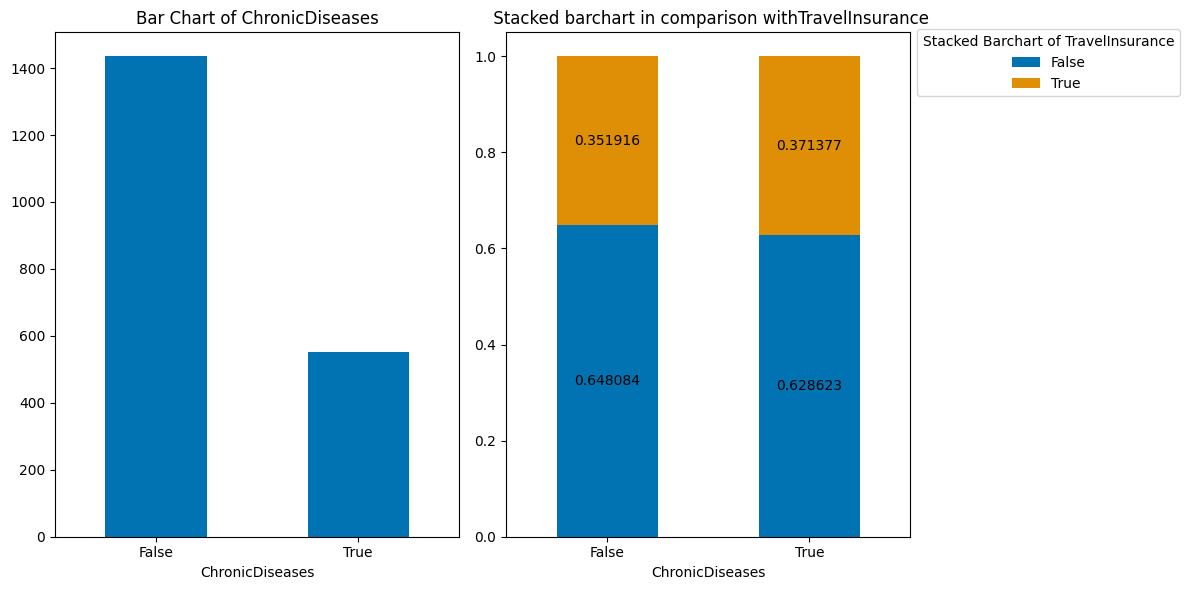

<IPython.core.display.Javascript object>

In [11]:
analysis_functions.plot_bar_and_stacked_bar(
    insurance_data,
    x_column="ChronicDiseases",
    hue_column="TravelInsurance",
    figsize=(12, 6),
)

More People have not chronic deseases. Ratio between those groups in respect of travel insurance  is almost the same.

## How many respondents is Graduated  and travel insurance buying between these groups

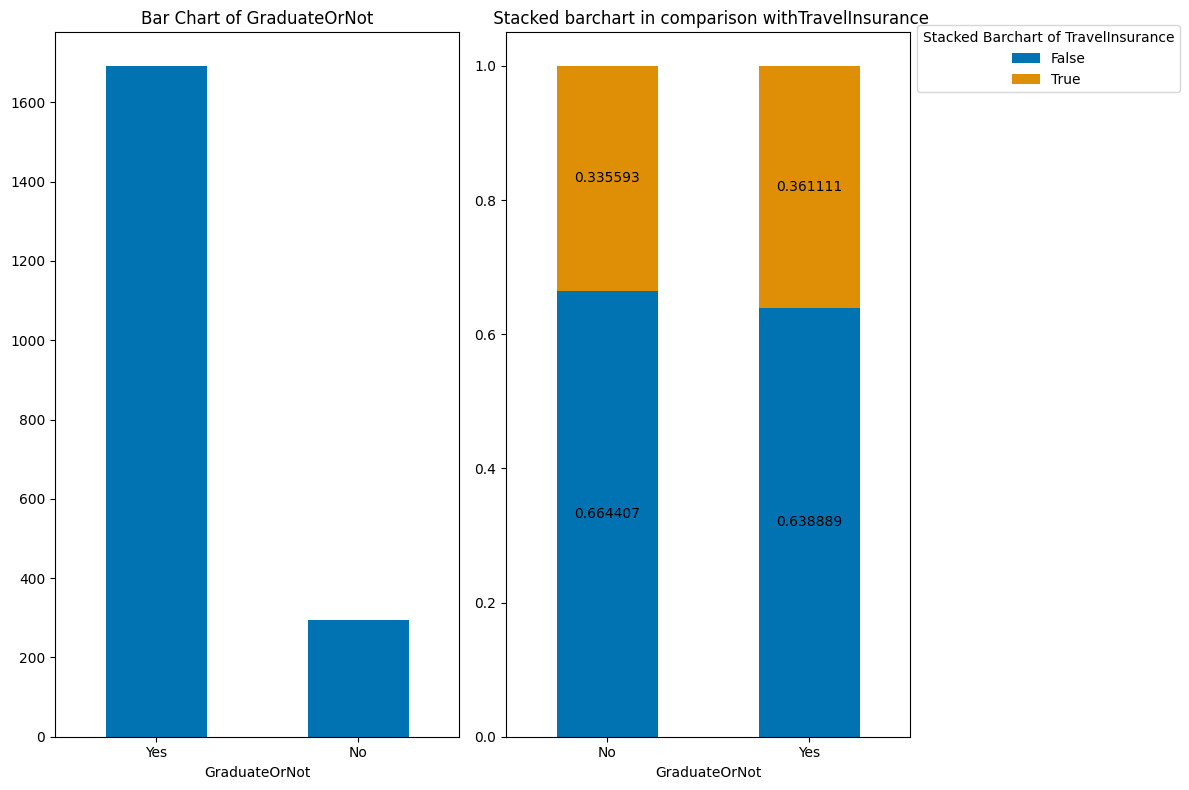

<IPython.core.display.Javascript object>

In [12]:
analysis_functions.plot_bar_and_stacked_bar(
    insurance_data,
    x_column="GraduateOrNot",
    hue_column="TravelInsurance",
)

More People are graduated than not. Ratio between those groups in respect of travel insurance is almost the same.

## How many respondents is from goverment or private sectors and travel insurance buying between these groups 

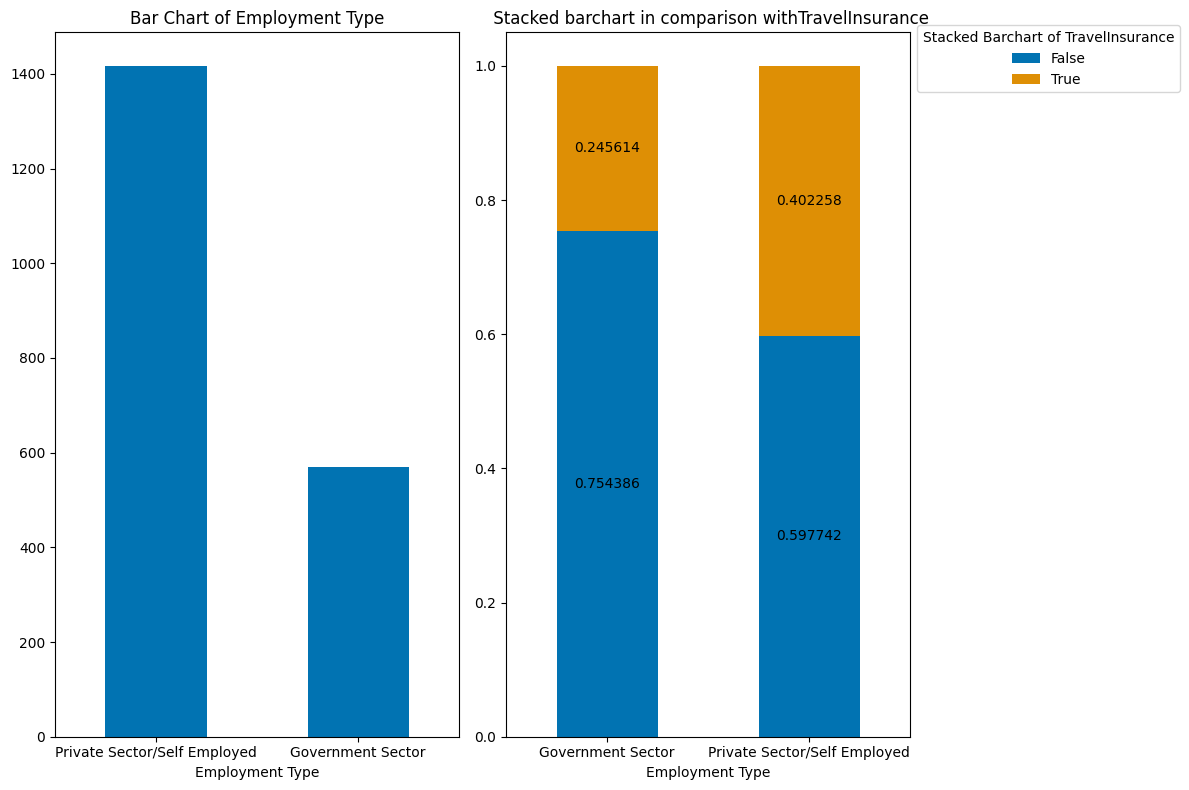

<IPython.core.display.Javascript object>

In [13]:
analysis_functions.plot_bar_and_stacked_bar(
    insurance_data,
    x_column="Employment Type",
    hue_column="TravelInsurance",
)

More People works in private sector. People who works in private sector, are more likely to have travel insurance

## How many respondents is frequent flyer or not  and travel insurance buying between these groups  

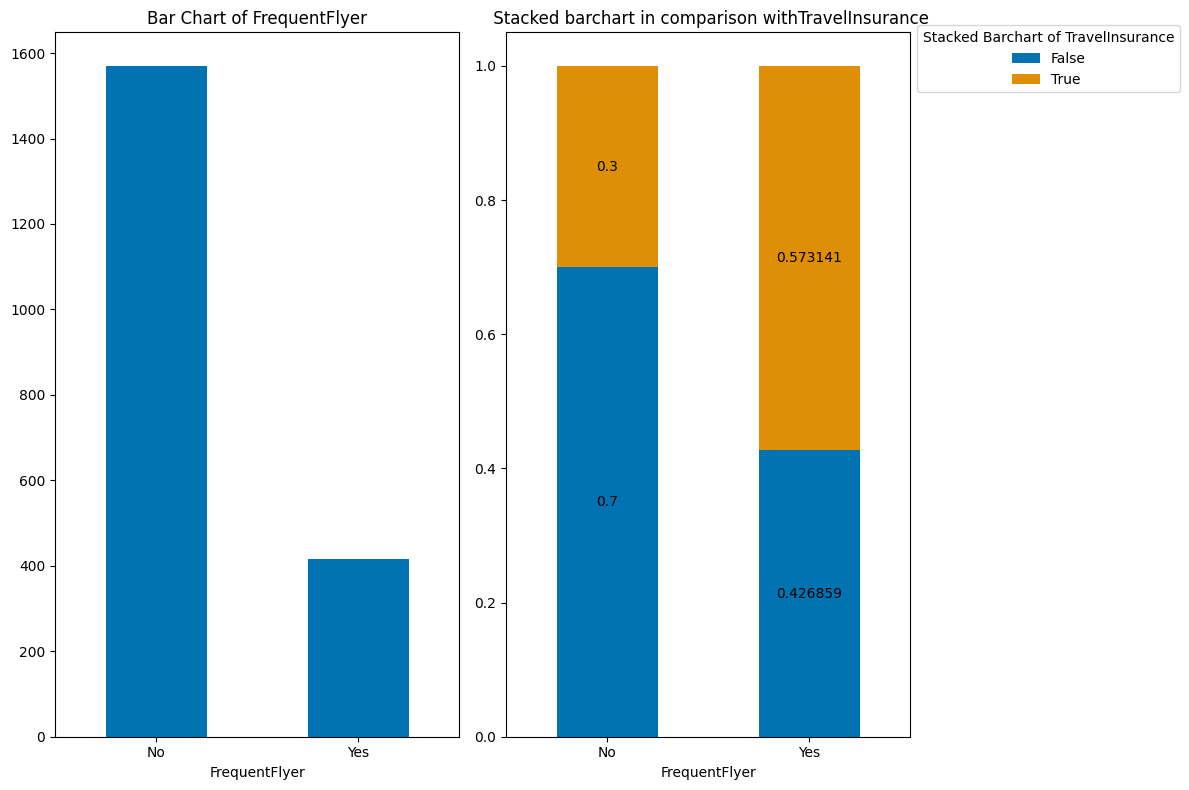

<IPython.core.display.Javascript object>

In [14]:
analysis_functions.plot_bar_and_stacked_bar(
    insurance_data,
    x_column="FrequentFlyer",
    hue_column="TravelInsurance",
    # title1="Employment Type proportion of travel insurance bought",
)

More People aren't frequent flyer. People who are frequent flyer  are more likely to have travel insurance.

## How many respondents have ever travelled abroad or not  and travel insurance buying between these groups  

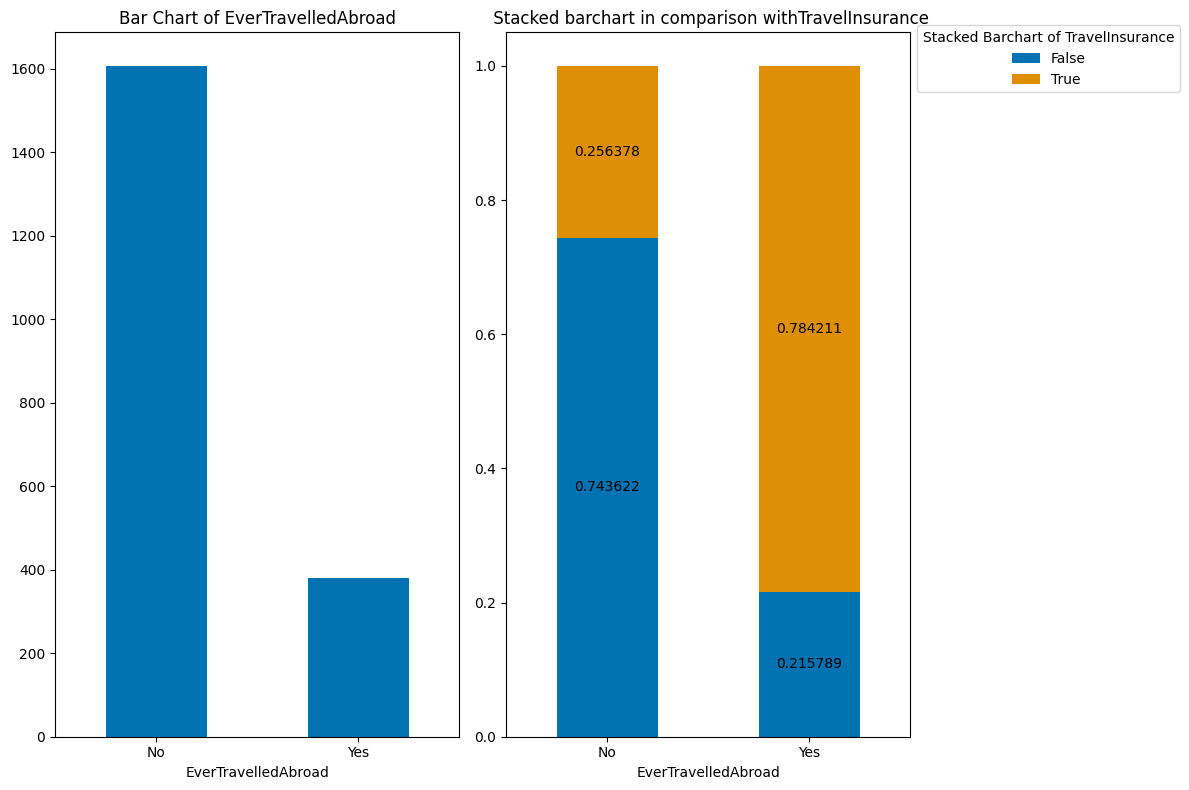

<IPython.core.display.Javascript object>

In [15]:
analysis_functions.plot_bar_and_stacked_bar(
    insurance_data,
    x_column="EverTravelledAbroad",
    hue_column="TravelInsurance",
)

More People haven't ever travelled abroad. People who have ever travelled abroad  are more likely to have travel insurance.

# Exploration of numerical features

In [98]:
with_insurance = insurance_data[insurance_data["TravelInsurance"] == True]
without_insurance = insurance_data[insurance_data["TravelInsurance"] == False]

<IPython.core.display.Javascript object>

# Exploration of our only ordinal feature "FamilyMembers" 

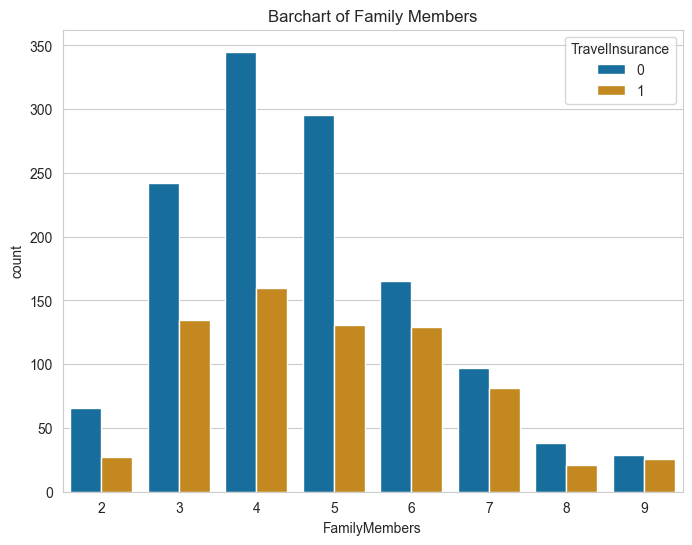

<IPython.core.display.Javascript object>

In [101]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x=insurance_data["FamilyMembers"], hue=insurance_data["TravelInsurance"]
)
ax.set_title("Barchart of Family Members")
plt.show()

We can see that shen number of family members increases , increases a chance of buying travel insurance

## Continious  feature "Age" 

In [21]:
print("Oldest Passenger was of:", insurance_data["Age"].max(), "Years")
print("Youngest Passenger was of:", insurance_data["Age"].min(), "Years")
print("Average Age of the passengers:", insurance_data["Age"].mean(), "Years")
print("Most of the passengers are age of:", insurance_data["Age"].median(), "Years")

Oldest Passenger was of: 35 Years
Youngest Passenger was of: 25 Years
Average Age of the passengers: 29.650226472068447 Years
Most of the passengers are age of: 29.0 Years


<IPython.core.display.Javascript object>

In [22]:
pd.concat(
    [
        with_insurance["Age"].describe(),
        without_insurance["Age"].describe(),
    ],
    axis=1,
)

,Age,Age
count,710.000000,1277.000000
mean,29.888732,29.517619
std,3.331732,2.644396
min,25.000000,25.000000
25%,27.000000,28.000000
50%,30.000000,29.000000
75%,33.000000,31.000000
max,35.000000,35.000000


<IPython.core.display.Javascript object>

In [23]:
with_insurance["Age"].median()

30.0

<IPython.core.display.Javascript object>

In [24]:
without_insurance["Age"].median()

29.0

<IPython.core.display.Javascript object>

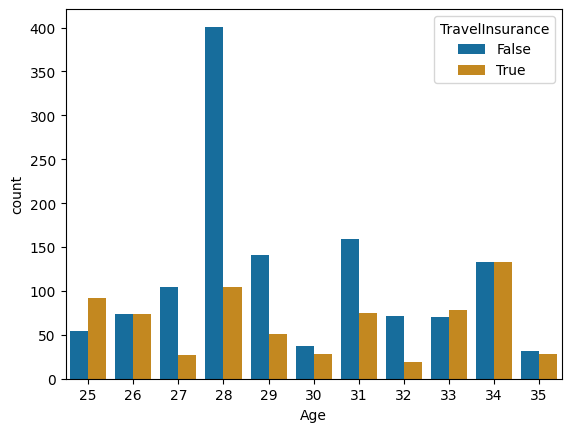

<IPython.core.display.Javascript object>

In [25]:
sns.countplot(x=insurance_data["Age"], hue=insurance_data["TravelInsurance"])
plt.show()

We see that people youngest peoples tend to have travel insurance and oldest peoples  in our respondents range

This could be , because younger people get travel insurance from family, then they go to live alone and after they create a family  it again starts buyng travel insurance

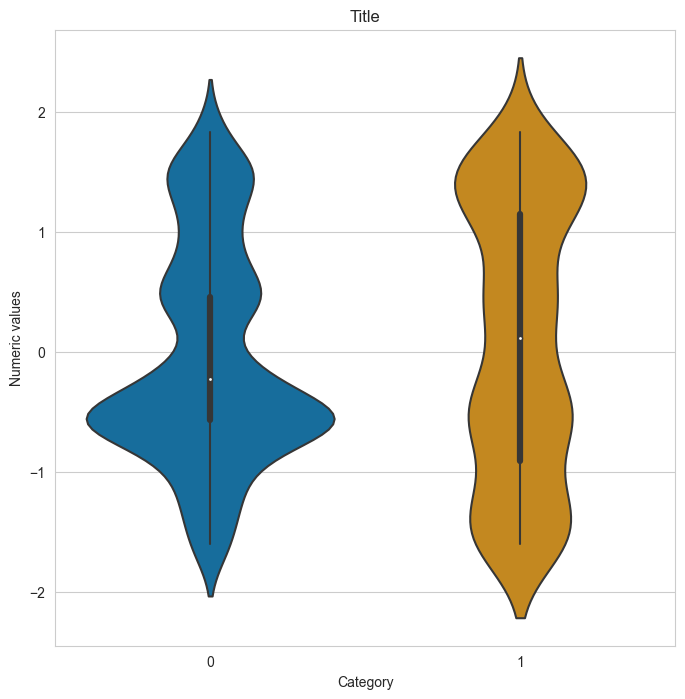

<IPython.core.display.Javascript object>

In [102]:
analysis_functions.violinplot(insurance_data, "TravelInsurance", "Age")

In [28]:
older_group = insurance_data[insurance_data["Age"] > 32]
younger_group = insurance_data[insurance_data["Age"] <= 32]


<IPython.core.display.Javascript object>

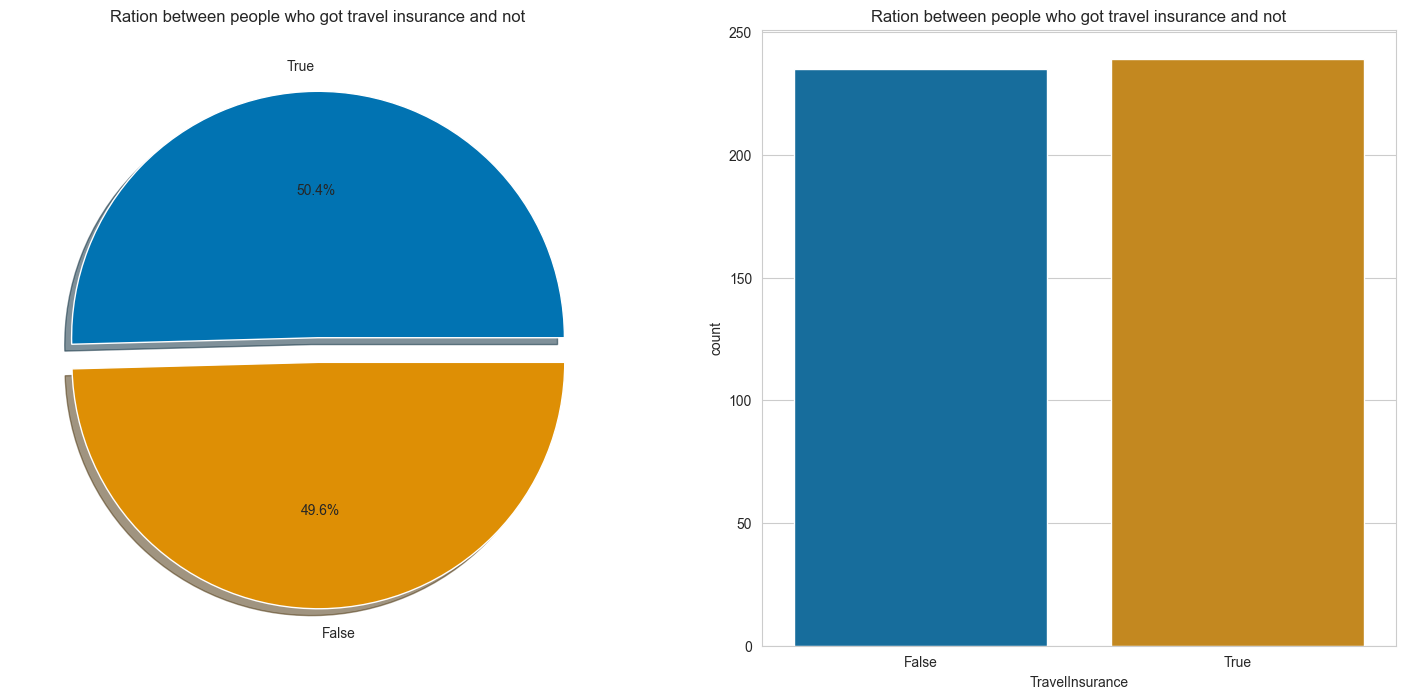

<IPython.core.display.Javascript object>

In [29]:
analysis_functions.pie_count_subplot_single(
    older_group["TravelInsurance"],
    title="Ration between people who got travel insurance and not",
)

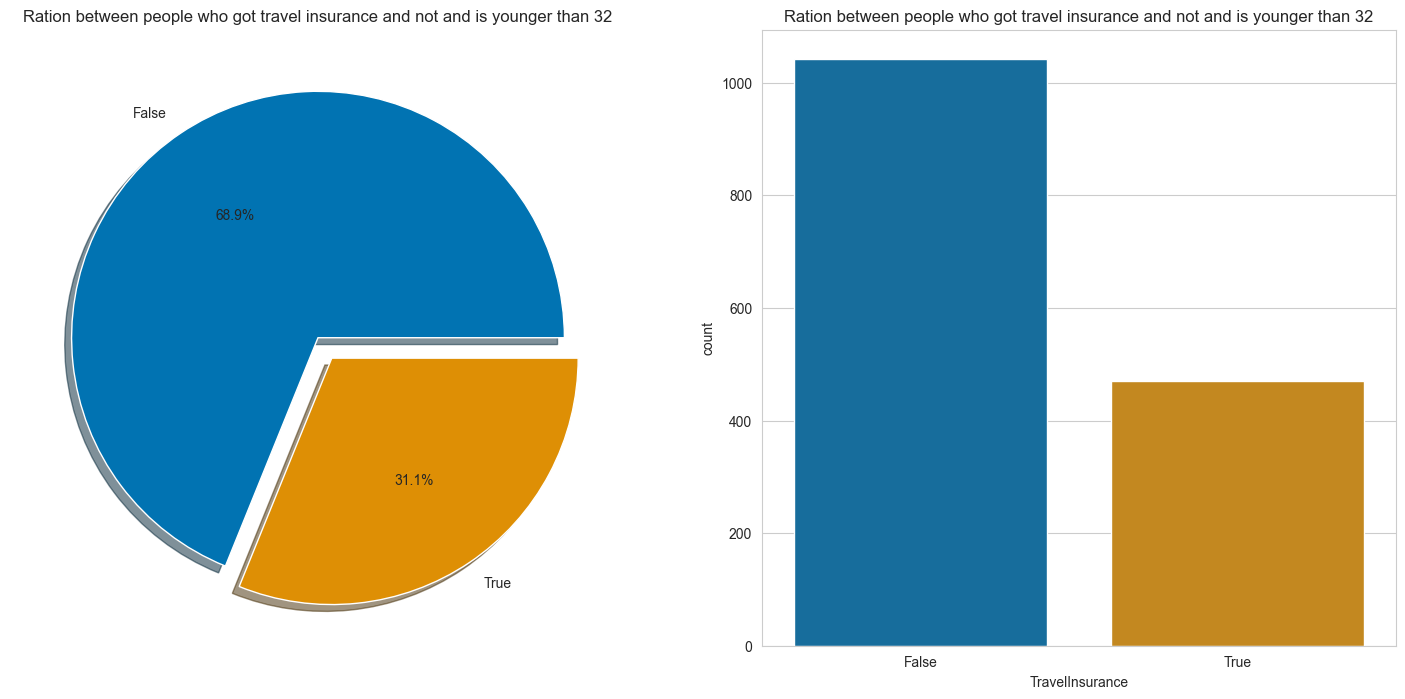

<IPython.core.display.Javascript object>

In [30]:
analysis_functions.pie_count_subplot_single(
    younger_group["TravelInsurance"],
    title="Ration between people who got travel insurance and not and is younger than 32",
)

## Continiuos variable "Annuall income 

### Annuall income statistical info from two groups: with and without travel insurance 

In [31]:
pd.concat(
    [
        with_insurance["AnnualIncome"].describe(),
        without_insurance["AnnualIncome"].describe(),
    ],
    axis=1,
)

,AnnualIncome,AnnualIncome
count,7.100000e+02,1.277000e+03
mean,1.133239e+06,8.212999e+05
std,3.748447e+05,3.288989e+05
min,3.000000e+05,3.000000e+05
25%,8.000000e+05,5.500000e+05
50%,1.250000e+06,8.000000e+05
75%,1.400000e+06,1.100000e+06
max,1.800000e+06,1.750000e+06


<IPython.core.display.Javascript object>

* Respondents who have bought travel insurance tends to have bigger annuall income

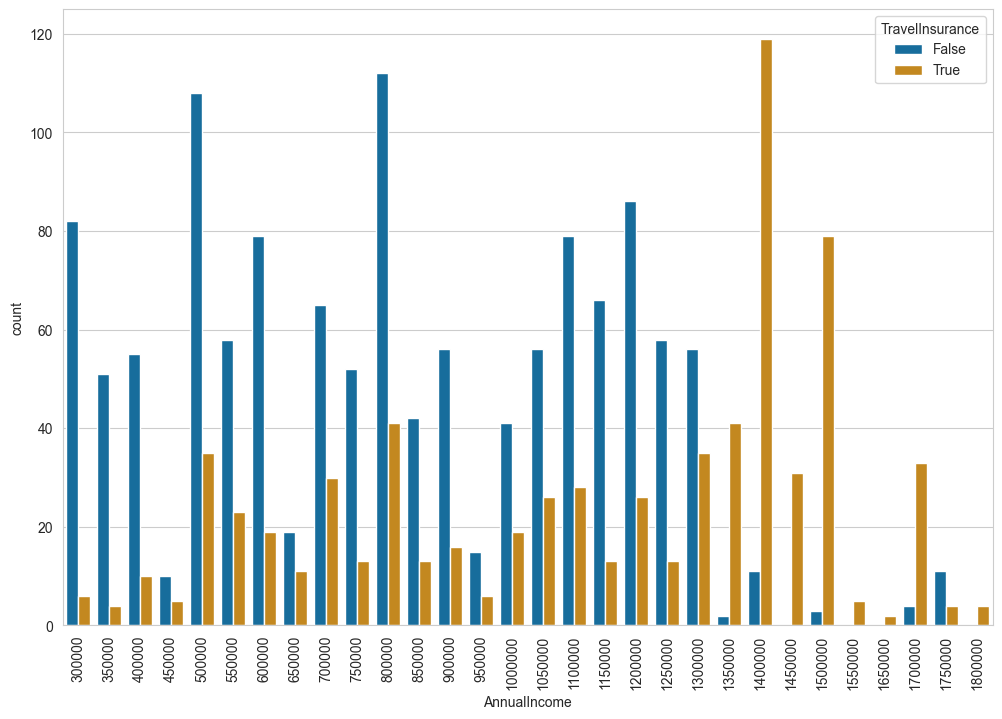

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(x=insurance_data["AnnualIncome"], hue=insurance_data["TravelInsurance"])
plt.xticks(rotation=90)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


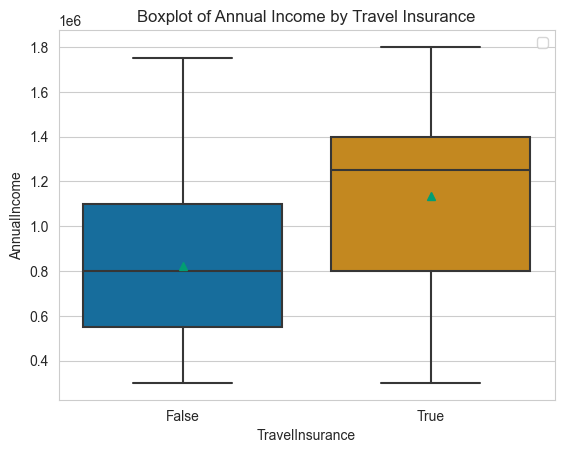

<IPython.core.display.Javascript object>

In [33]:
# Create a boxplot of the annual_income column for each group
sns.boxplot(x="TravelInsurance", y="AnnualIncome", showmeans=True, data=insurance_data)

# Add a legend to the plot
plt.legend()

# Update the title of the plot
plt.title("Boxplot of Annual Income by Travel Insurance")

# Show the plot
plt.show()

*  Group without travel insurance upper bounds is alomst as group with travel insurance mean 
*  Group with travel insurance lower bounds is alomst as group without travel insurance mean
* We will split annual income by it , when we are making feature engineering

# Feature engineering

### Age 

In [34]:
# Create a new feature called `income_group`
age_group = pd.cut(insurance_data["Age"], [0, 26, 32, float("inf")], labels=[1, 2, 3])

# Add the new feature to the DataFrame
insurance_data["age_group"] = age_group

<IPython.core.display.Javascript object>

Spliting age variable into categorical variable

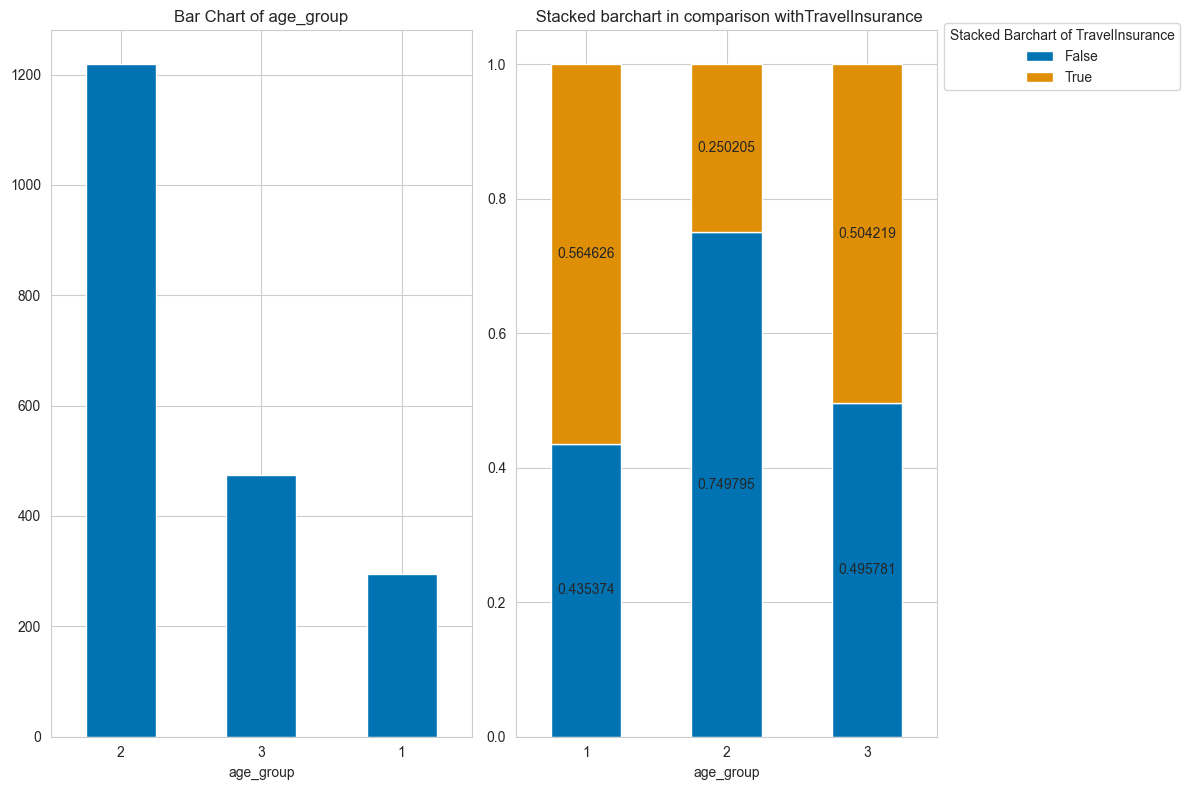

<IPython.core.display.Javascript object>

In [35]:
analysis_functions.plot_bar_and_stacked_bar(
    insurance_data,
    x_column="age_group",
    hue_column="TravelInsurance",
)

### Annuall Income 

In [36]:
# Create a new feature called `income_group`
income_group = pd.cut(
    insurance_data["AnnualIncome"], [0, 800000, 1100001, float("inf")], labels=[1, 2, 3]
)

# Add the new feature to the DataFrame
insurance_data["income_group"] = income_group

<IPython.core.display.Javascript object>

Spliting age variable into categorical variable

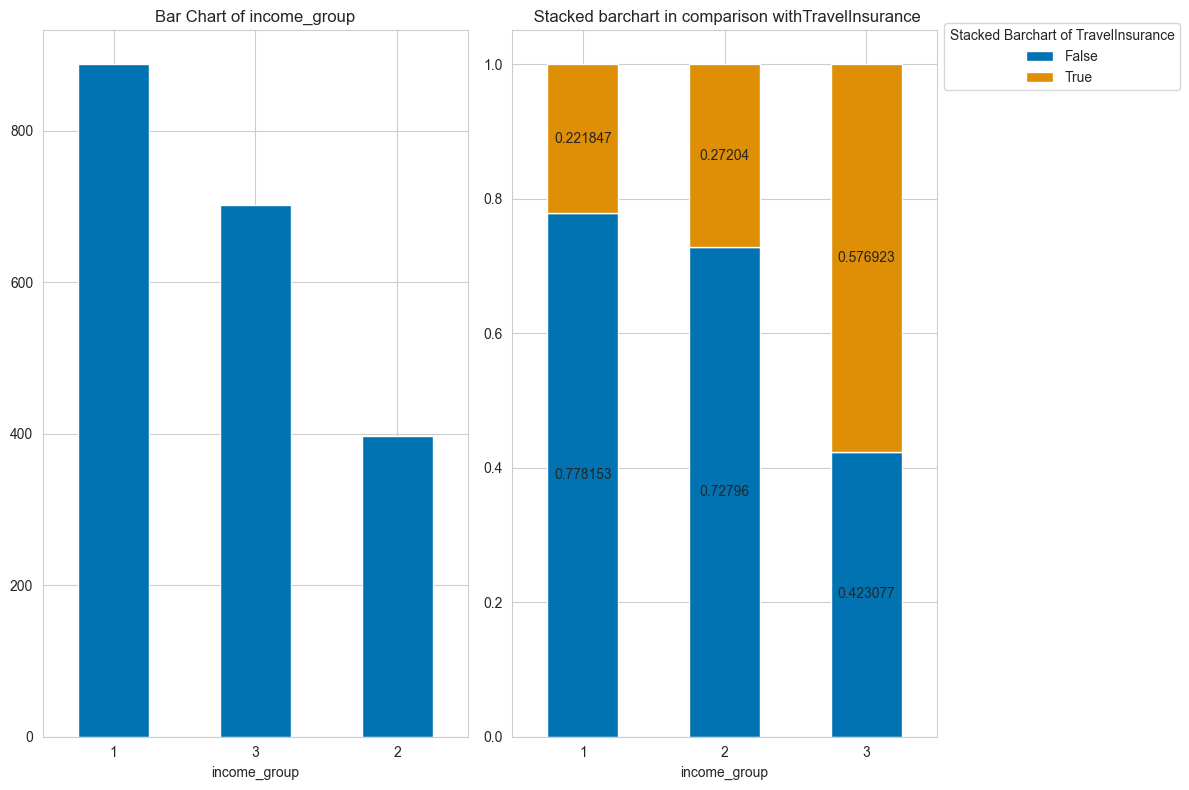

<IPython.core.display.Javascript object>

In [38]:
analysis_functions.plot_bar_and_stacked_bar(
    insurance_data,
    x_column="income_group",
    hue_column="TravelInsurance",
)

In [39]:
non_numeric_features = insurance_data.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()
for feature in non_numeric_features:
    insurance_data[feature] = encoder.fit_transform(insurance_data[feature])

<IPython.core.display.Javascript object>

In [40]:
numerical_features = ["Age", "AnnualIncome"]

<IPython.core.display.Javascript object>

In [41]:
scaler = StandardScaler()
insurance_data[numerical_features] = scaler.fit_transform(
    insurance_data[numerical_features]
)

<IPython.core.display.Javascript object>

In [42]:
insurance_data = pd.get_dummies(insurance_data, columns=non_numeric_features)

<IPython.core.display.Javascript object>

In [43]:
bool_columns = insurance_data.select_dtypes(include=["bool"]).columns
for column in bool_columns:
    insurance_data[column] = insurance_data[column].astype(int)
insurance_data.update(insurance_data)

<IPython.core.display.Javascript object>

In [44]:
insurance_data["income_group"] = insurance_data["income_group"].astype(int)
insurance_data["age_group"] = insurance_data["age_group"].astype(int)

<IPython.core.display.Javascript object>

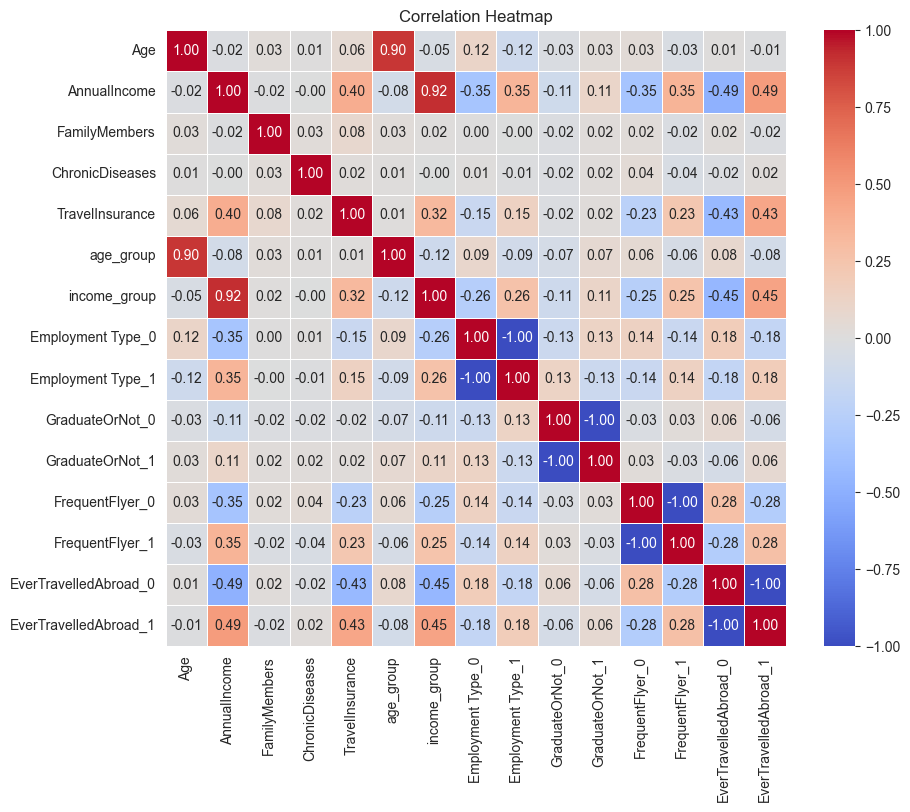

<IPython.core.display.Javascript object>

In [45]:
# Select only numeric columns
numeric_columns = insurance_data.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

In a dataset there is no highly correlated features. In this plot Where is high correlation (higher than 0.6) is because of features encoding and engineering

In [46]:
from scipy.stats import chi2_contingency

# Iterate through each feature column (assuming 'target' is the name of the target variable)
target_column = "TravelInsurance"

for feature_column in insurance_data.columns:
    if feature_column != target_column:
        # Create a contingency table (cross-tabulation) for the feature and target
        contingency_table = pd.crosstab(
            insurance_data[feature_column], insurance_data[target_column]
        )

        # Perform the chi-squared test
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        # Check if the p-value is less than the significance level (e.g., 0.05)
        if p_value < 0.05:
            print(
                f"Feature '{feature_column}' is significant with p-value = {p_value:.4f}"
            )
        else:
            print(
                f"Feature '{feature_column}' is not significant with p-value = {p_value:.4f}"
            )

Feature 'Age' is significant with p-value = 0.0000
Feature 'AnnualIncome' is significant with p-value = 0.0000
Feature 'FamilyMembers' is significant with p-value = 0.0001
Feature 'ChronicDiseases' is not significant with p-value = 0.4481
Feature 'age_group' is significant with p-value = 0.0000
Feature 'income_group' is significant with p-value = 0.0000
Feature 'Employment Type_0' is significant with p-value = 0.0000
Feature 'Employment Type_1' is significant with p-value = 0.0000
Feature 'GraduateOrNot_0' is not significant with p-value = 0.4365
Feature 'GraduateOrNot_1' is not significant with p-value = 0.4365
Feature 'FrequentFlyer_0' is significant with p-value = 0.0000
Feature 'FrequentFlyer_1' is significant with p-value = 0.0000
Feature 'EverTravelledAbroad_0' is significant with p-value = 0.0000
Feature 'EverTravelledAbroad_1' is significant with p-value = 0.0000


<IPython.core.display.Javascript object>

We have two insignificant features to our target variable "TravelInsurance". These two features are:
* Feature 'GraduateOrNot' is not significant with p-value = 0.4365
* Feature 'ChronicDiseases' is not significant with p-value = 0.4481

## Lasso Ridge classifiers to select which features to keep from related features

In [47]:
X = insurance_data.drop("TravelInsurance", axis=1)  # Adjust column names as needed
y = insurance_data["TravelInsurance"]

<IPython.core.display.Javascript object>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

Accuracy: 0.7613065326633166
Precision: 0.7422680412371134


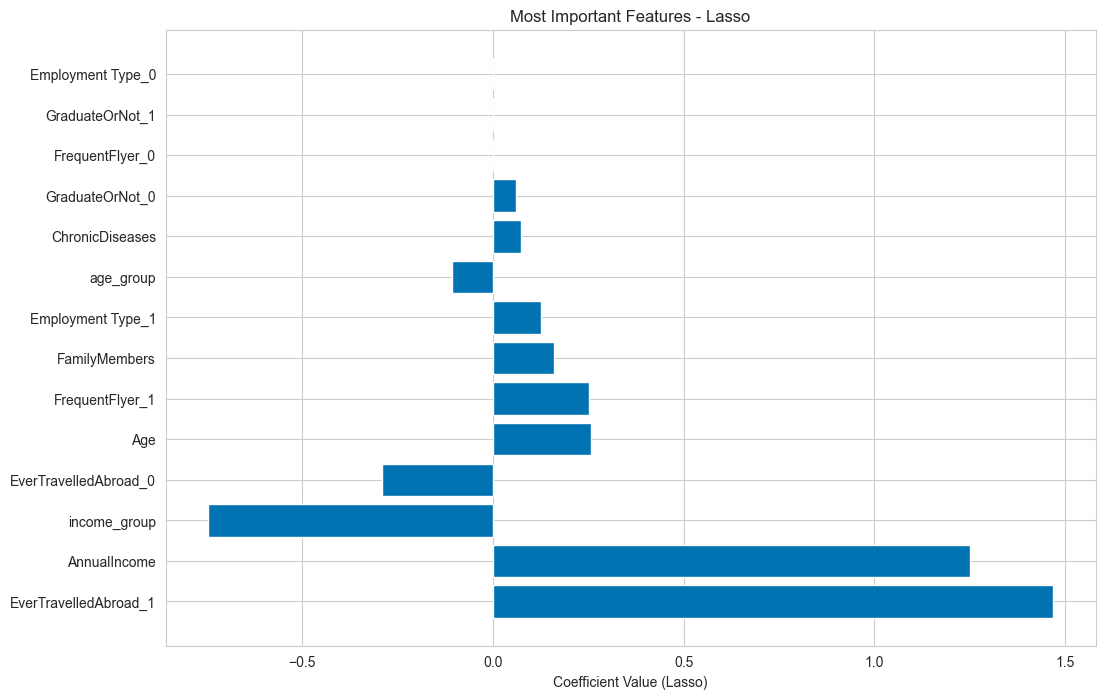

<IPython.core.display.Javascript object>

In [49]:
analysis_functions.lasso_classifier(X_train, y_train, X_test, y_test, X)

Accuracy: 0.7613065326633166
Precision: 0.7373737373737373


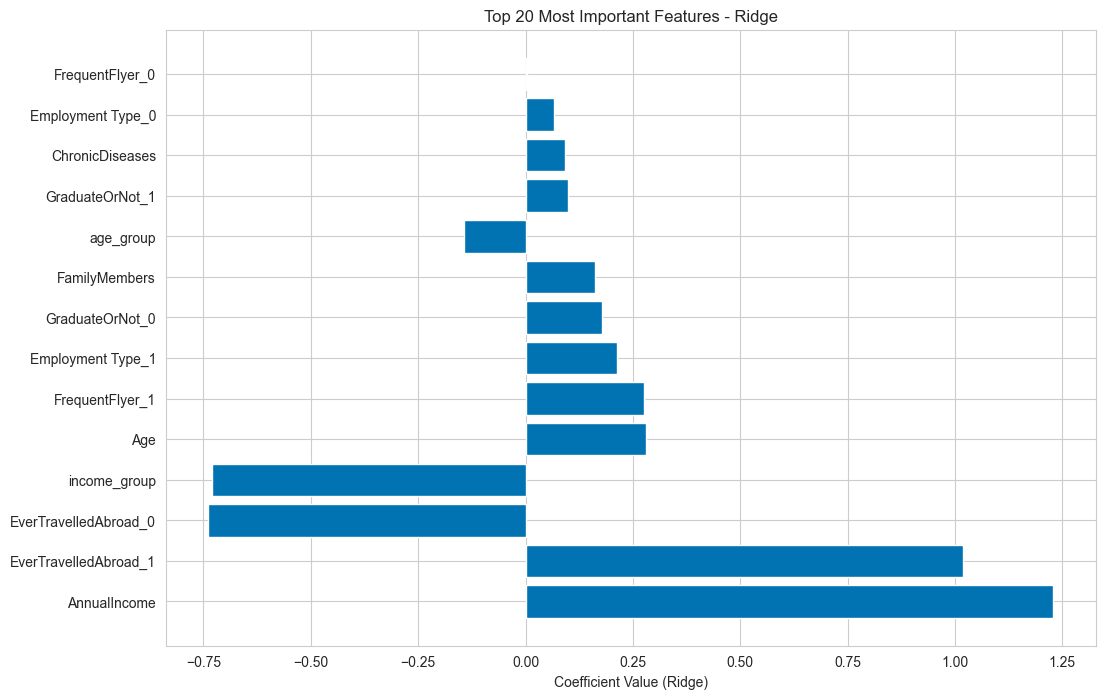

<IPython.core.display.Javascript object>

In [50]:
analysis_functions.ridge_classifier(X_train, y_train, X_test, y_test, X)

We have checked wich features are most important by Lasso and Ridge classifiers. Lasso performed better, thats why, we will delete correlated features, by lasso feature importance and those features which was insignificant when we did chi-squered tests

### Droping bad features

In [51]:
features_to_drop = [
    "income_group",
    "age_group",
    "ChronicDiseases",
    "FrequentFlyer_1",
    "GraduateOrNot_0",
    "GraduateOrNot_1",
    "EverTravelledAbroad_1",
    "Employment Type_1",
]

<IPython.core.display.Javascript object>

In [52]:
insurance_data = insurance_data.drop(columns=features_to_drop, axis=1)

<IPython.core.display.Javascript object>

In [53]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1987 non-null   float64
 1   AnnualIncome           1987 non-null   float64
 2   FamilyMembers          1987 non-null   int64  
 3   TravelInsurance        1987 non-null   int32  
 4   Employment Type_0      1987 non-null   int32  
 5   FrequentFlyer_0        1987 non-null   int32  
 6   EverTravelledAbroad_0  1987 non-null   int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 77.7 KB


<IPython.core.display.Javascript object>

# Model fiting
## Generalized Logorithmic model  

In [54]:
X = insurance_data.drop("TravelInsurance", axis=1)  # Adjust column names as needed
y = insurance_data["TravelInsurance"]

<IPython.core.display.Javascript object>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit the GLM model on the training data
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()

# Make predictions on the testing data
predicted_values = result.predict(X_test)

# Create a DataFrame with actual and predicted values for the testing set
results_df = pd.DataFrame({"Actual": y_test, "Predicted": predicted_values})

# Get the summary of the model
summary = result.summary()

# Print the summary
print(summary)

# Display the DataFrame with actual vs. predicted values for the testing set

                 Generalized Linear Model Regression Results                  
Dep. Variable:        TravelInsurance   No. Observations:                 1589
Model:                            GLM   Df Residuals:                     1583
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -822.32
Date:                Tue, 10 Oct 2023   Deviance:                       1644.6
Time:                        12:16:21   Pearson chi2:                 1.64e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2358
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.21

<IPython.core.display.Javascript object>

This model shows that there is big room for more features which would be significant to our target.
For this model only insignificant feature is Employment Type. We will keep this feature for other models , because previously by tests it was shown significant and other models can capture other type of relationships

## TPOT Classifier for finding  possible best model for our problem

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

# Create a TPOTClassifier instance with custom settings
tpotTIP = TPOTClassifier(
    verbosity=2,
    generations=15,
    population_size=10,
    random_state=42,
    config_dict="TPOT sparse",
    max_eval_time_mins=10,
)

# Define a custom scoring function for macro-averaged precision
scorer = make_scorer(precision_score, average="macro")  # Change 'average' to 'macro'

# Fit TPOT to the training data
tpotTIP.fit(X_train, y_train)

# Access the best pipeline
best_pipeline = tpotTIP.fitted_pipeline_

# Perform cross-validation to obtain macro-averaged precision scores
precision_scores = cross_val_score(
    best_pipeline, X_train, y_train, cv=5, scoring=scorer
)

# Print the cross-validation macro-averaged precision scores
print("Cross-validation Macro-Averaged Precision Scores:", precision_scores)

# Fit the best pipeline to the training data
best_pipeline.fit(X_train, y_train)

# Evaluate the best pipeline on the test set using precision
y_pred = best_pipeline.predict(X_test)
precision = precision_score(y_test, y_pred, average="macro")  # Specify 'macro' here

# Print the test set macro-averaged precision score
print(f"Test Set Macro-Averaged Precision: {precision}")

                                                                             
Generation 1 - Current best internal CV score: 0.8319623831914769
                                                                             
Generation 2 - Current best internal CV score: 0.8338531436620835
                                                                             
Generation 3 - Current best internal CV score: 0.8338531436620835
                                                                             
Generation 4 - Current best internal CV score: 0.8338531436620835
                                                                             
Generation 5 - Current best internal CV score: 0.8338531436620835
                                                                             
Generation 6 - Current best internal CV score: 0.8363688669325239
                                                                             
Generation 7 - Current best internal CV score: 0.836368866

<IPython.core.display.Javascript object>

Best model by TPOT is  XGBClassifier With Macro-Averaged Precision: 0.8334754191531686  

## Hyper parameters tuning 

## Finding models best parameters for  precision of guessing person who would buy travel insurance


 Models that we build , before ensembling:
* "SVM",
* "Logistic Regression",
* "KNN",
* "Decision Tree",
* "Naive Bayes",
* "Random Forest"

### Hyper parameters tuning for Support Vector Machines

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

C = uniform(loc=0.05, scale=1.0)
gamma = uniform(loc=0.1, scale=0.9)
kernel = ["rbf", "linear"]

hyper = {"kernel": kernel, "C": C, "gamma": gamma}

# Create a RandomizedSearchCV object for SVM with precision as scoring metric
rs = RandomizedSearchCV(
    estimator=svm.SVC(),
    param_distributions=hyper,
    n_iter=100,
    verbose=True,
    random_state=42,
    scoring="precision_macro",
    cv=5,  # Use cross-validation with 5 folds
)
rs.fit(X, y)

print("Best Precision Score:", rs.best_score_)

print("Best Estimator for Precision:")
print(rs.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Precision Score: 0.843854524251413
Best Estimator for Precision:
SVC(C=0.1695942459383017, gamma=0.7419203085006955)


<IPython.core.display.Javascript object>

### Hyper parameters tuning for Random forest classifier

In [74]:
# Define a parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [100, 136, 200],  # Add extra values to search
    "max_depth": [30, 50, 70],  # Add extra values to search
    "min_samples_leaf": [2, 3, 4],  # Add extra values to search
    "min_samples_split": [8, 10, 12],  # Add extra values to search
    "max_features": ["auto", "sqrt"],
    "random_state": [0],  # You can specify other random_state values
}

# Create the GridSearchCV object with precision as the scoring metric
gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    verbose=True,
    scoring="precision_macro",
    cv=5,
)

# Fit the GridSearchCV object to your data
gs.fit(X, y)

# Print the best precision score and best estimator found during the grid search
print("Best Precision Macro Score (GridSearchCV):", gs.best_score_)

print("Best Estimator for Precision Macro (GridSearchCV):")
print(gs.best_estimator_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Precision Macro Score (GridSearchCV): 0.8655449876965559
Best Estimator for Precision Macro (GridSearchCV):
RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=0)


<IPython.core.display.Javascript object>

### Hyper parameters tuning for KNN 

In [76]:
# Define the range of values for n_neighbors you want to search
n_neighbors = range(1, 50)  # You can adjust the range as needed

# Create a parameter grid dictionary
hyper = {"n_neighbors": n_neighbors}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a custom scoring function for precision_macro
precision_macro_scorer = make_scorer(precision_score, average="macro")

# Perform grid search using GridSearchCV with precision_macro as the scoring metric
gd = GridSearchCV(
    estimator=knn, param_grid=hyper, verbose=True, scoring=precision_macro_scorer, cv=5
)
gd.fit(X, y)

# Print the best precision_macro score and best estimator
print("Best Precision Macro Score:", gd.best_score_)
print("Best Estimator for Precision Macro:")
print(gd.best_estimator_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Precision Macro Score: 0.8440022196245041
Best Estimator for Precision Macro:
KNeighborsClassifier(n_neighbors=16)


<IPython.core.display.Javascript object>

### Hyper parameters tuning for Support Vector Machines

In [78]:
# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Define hyperparameter search space for Logistic Regression
param_dist = {
    "C": np.logspace(-3, 3, 100),  # Regularization strength
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear"],  # For small datasets, 'liblinear' is a good choice
}

# Perform randomized hyperparameter tuning to maximize precision
rs = RandomizedSearchCV(
    estimator=logistic_regression,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    verbose=True,
    random_state=42,
    scoring="precision_macro",  # Optimize for precision
    cv=5,  # Use 
)
rs.fit(X, y)

# Print the best precision score and best estimator found during the search
print("Best Precision Score:", rs.best_score_)
print("Best Estimator for Precision:")
print(rs.best_estimator_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Precision Score: 0.823881722621137
Best Estimator for Precision:
LogisticRegression(C=0.003511191734215131, solver='liblinear')


<IPython.core.display.Javascript object>

## Again validating models with best hyper parameters  performance and comparing to other models

In [81]:
from sklearn.model_selection import KFold  # for K-fold cross validation
from sklearn.model_selection import cross_val_score  # score evaluation
from sklearn.model_selection import cross_val_predict  # prediction
from sklearn.naive_bayes import GaussianNB


# Define the number of splits for k-fold cross-validation
n_splits = 5
random_state = 22
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Lists of classifiers and models
models = [
    svm.SVC(kernel="rbf", C=0.1431027678058992, gamma=0.907494182157994),
    LogisticRegression(C=0.003511191734215131, solver="liblinear"),
    KNeighborsClassifier(n_neighbors=16),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(
        max_depth=50,
        min_samples_leaf=3,
        min_samples_split=10,
        n_estimators=136,
        random_state=0,
    ),
    XGBClassifier(
        learning_rate=0.1,
        max_depth=3,
        min_child_weight=2,
        n_estimators=100,
        n_jobs=1,
        subsample=0.9000000000000001,
        verbosity=0,
    ),
]

# Update the classifiers list accordingly
classifiers = [
    "Radial SVM",
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Naive Bayes",
    "Random Forest",
    "TpotXGBoost"
    # Add more classifiers here as needed
]

# Lists to store results
xyz = []
precision = []  # Store precision scores

# Loop through each model, perform cross-validation, and store results
for model in models:
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring="precision_macro")
    xyz.append(cv_result.mean())

    # Calculate precision scores and store them
    precision_scores = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision_scores.append(precision_score(y_test, y_pred))
    precision.append(np.mean(precision_scores))

# Create a DataFrame to display the results
new_models_dataframe2 = pd.DataFrame(
    {"CV precision macro Mean": xyz, "Precision mean": precision}, index=classifiers
)
print(new_models_dataframe2)

                     CV precision macro Mean  Precision mean
Radial SVM                          0.843757        0.894757
Logistic Regression                 0.822423        0.883215
KNN                                 0.842140        0.884367
Decision Tree                       0.768308        0.737142
Naive Bayes                         0.728090        0.691375
Random Forest                       0.855689        0.899105
TpotXGBoost                         0.866486        0.923921


<IPython.core.display.Javascript object>

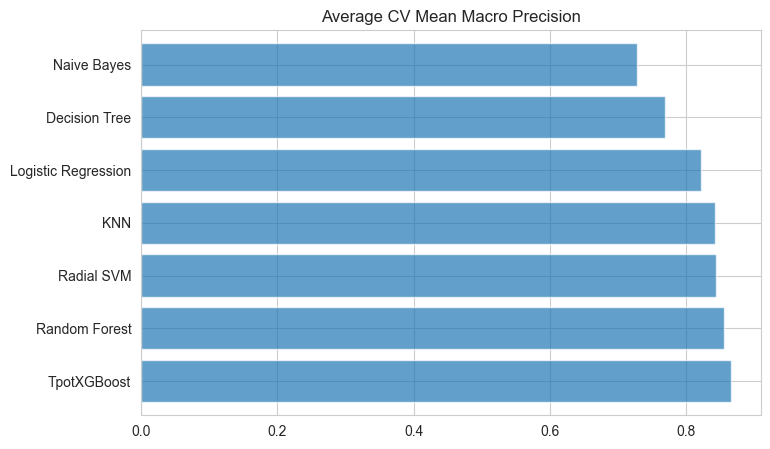

<IPython.core.display.Javascript object>

In [82]:
# Sort the data by "CV Mean" in descending order
sorted_df = new_models_dataframe2.sort_values(
    by="CV precision macro Mean", ascending=False
)

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot of "CV Mean" values
sorted_df["CV precision macro Mean"].plot.barh(
    width=0.8, ax=ax, color="tab:blue", alpha=0.7
)

# Set title
plt.title("Average CV Mean Macro Precision")

# Show the bar chart
plt.show()

Best performing model till this point is:
* !.Model from a TPOT "TpotXGBoost	" with highest precision and macro precision
* 2.Random forest
* 3.Radial SVM

In [85]:
sorted_df

,CV precision macro Mean,Precision mean
TpotXGBoost,0.866486,0.923921
Random Forest,0.855689,0.899105
Radial SVM,0.843757,0.894757
KNN,0.842140,0.884367
Logistic Regression,0.822423,0.883215
Decision Tree,0.768308,0.737142
Naive Bayes,0.728090,0.691375


<IPython.core.display.Javascript object>

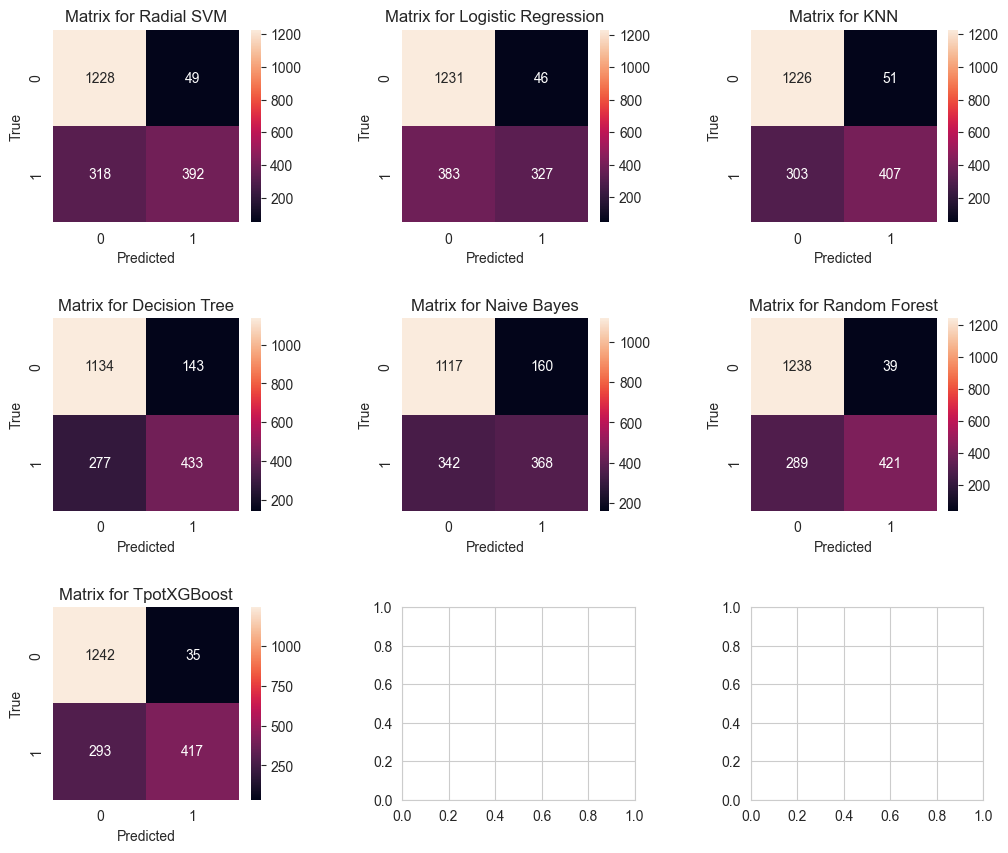

<IPython.core.display.Javascript object>

In [83]:
# Create subplots
f, ax = plt.subplots(3, 3, figsize=(12, 10))

# Loop through classifiers
for i, clf in enumerate(models):
    # Predict using cross-validation
    y_pred = cross_val_predict(clf, X, y, cv=10)

    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Create a heatmap for the confusion matrix with labels
    sns.heatmap(cm, ax=ax[i // 3, i % 3], annot=True, fmt="2.0f")
    ax[i // 3, i % 3].set_title(f"Matrix for {classifiers[i]}")

    # Add labels for the axes
    ax[i // 3, i % 3].set_xlabel("Predicted")
    ax[i // 3, i % 3].set_ylabel("True")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

* Here we can see models performance, during cross validation.
* best TPOT regression model , from 455 people , which model identified that they will buy travel insurance, 417 from them has bought it

# Cross validation of Voting and bagging models

* Voting model ensembled from previous models that we have built 
* 3 Bagging models made from previously 3 best performed models

In [64]:
BRF_base_estimator = RandomForestClassifier(
    max_depth=50,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=136,
    random_state=0,
)
BSVC_base_estimator = SVC(
    kernel="rbf",
    random_state=0,
    C=0.1431027678058992,
    gamma=0.907494182157994,
)

<IPython.core.display.Javascript object>

In [65]:
# Define the number of splits for k-fold cross-validation
n_splits = 5
random_state = 22
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Lists of classifiers and models
models = [
    VotingClassifier(
        estimators=[
            ("KNN", KNeighborsClassifier(n_neighbors=18)),
            (
                "RBF",
                SVC(
                    probability=True,
                    kernel="rbf",
                    C=0.1431027678058992,
                    gamma=0.907494182157994,
                ),
            ),
            (
                "Log",
                LogisticRegression(C=0.0013219411484660286, solver="liblinear"),
            ),
            (
                "Naive bayes",
                GaussianNB(),
            ),
            (
                "XGBoost",
                XGBClassifier(
                    learning_rate=0.1,
                    max_depth=3,
                    min_child_weight=2,
                    n_estimators=100,
                    n_jobs=1,
                    subsample=0.9000000000000001,
                    verbosity=0,
                ),
            ),
            (
                "RFor",
                RandomForestClassifier(
                    max_depth=40,
                    min_samples_leaf=5,
                    min_samples_split=8,
                    n_estimators=848,
                    random_state=0,
                ),
            ),
            ("DT", DecisionTreeClassifier()),
        ],
        voting="soft",
    ),
    BaggingClassifier(
        base_estimator=BRF_base_estimator,
        n_estimators=700,  # Number of base estimators (Random Forests) in the ensemble
        random_state=random_state,
    ),  # Add a comma here to separate the BaggingClassifier instances
    BaggingClassifier(
        base_estimator=KNeighborsClassifier(n_neighbors=18),
    ),
    BaggingClassifier(
        BSVC_base_estimator,  # Add the missing base estimator here
        random_state=0,
        n_estimators=700,
    ),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1),
    XGBClassifier(),
]

# Update the classifiers list accordingly
classifiers = [
    "Voting ensembled model",
    "Bagged Random Forest",
    "Bagged KNN",
    "Bagged SVM",
    "AdaBoost",
    "Gradient Boosting",
    "XGBC",
    # Add more classifiers here as needed
]

# Lists to store results
xyz = []
precision = []  # Store precision scores

# Initialize a list to store confusion matrices
confusion_matrices = []

# Loop through each model, perform cross-validation, and store results
for model in models:
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring="precision_macro")
    xyz.append(cv_result.mean())

    # Calculate precision scores and store them
    precision_scores = []
    model_confusion_matrices = []  # Store confusion matrices for each fold
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision_scores.append(precision_score(y_test, y_pred))

        # Calculate and store the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        model_confusion_matrices.append(cm)

    # Calculate the average confusion matrix across folds
    average_confusion_matrix = sum(model_confusion_matrices) / len(
        model_confusion_matrices
    )
    confusion_matrices.append(average_confusion_matrix)

    precision.append(np.mean(precision_scores))

# Create a DataFrame to display the results
new_models_dataframe3 = pd.DataFrame(
    {"CV precision macro Mean": xyz, "Precision mean": precision}, index=classifiers
)
print(new_models_dataframe3)

                        CV precision macro Mean  Precision mean
Voting ensembled model                 0.847345        0.890379
Bagged Random Forest                   0.860943        0.912025
Bagged KNN                             0.839552        0.870319
Bagged SVM                             0.843430        0.893233
AdaBoost                               0.856043        0.925187
Gradient Boosting                      0.840128        0.867899
XGBC                                   0.800133        0.793203


<IPython.core.display.Javascript object>

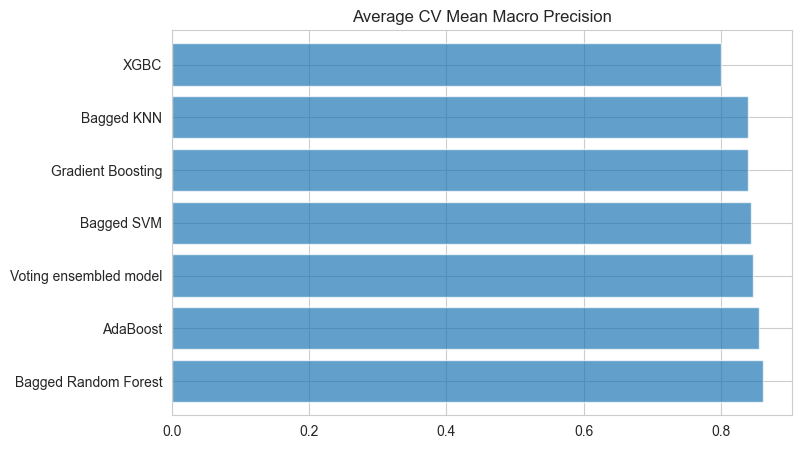

<IPython.core.display.Javascript object>

In [66]:
sorted_df = new_models_dataframe3.sort_values(
    by="CV precision macro Mean", ascending=False
)

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot of "CV Mean" values
sorted_df["CV precision macro Mean"].plot.barh(
    width=0.8, ax=ax, color="tab:blue", alpha=0.7
)

# Set title
plt.title("Average CV Mean Macro Precision")

# Show the bar chart
plt.show()

We can se here a performance of ensebled models. Bagged Random Forest  has the best performance, second is ada boost , with default paramdeters

#  Models classification matrices

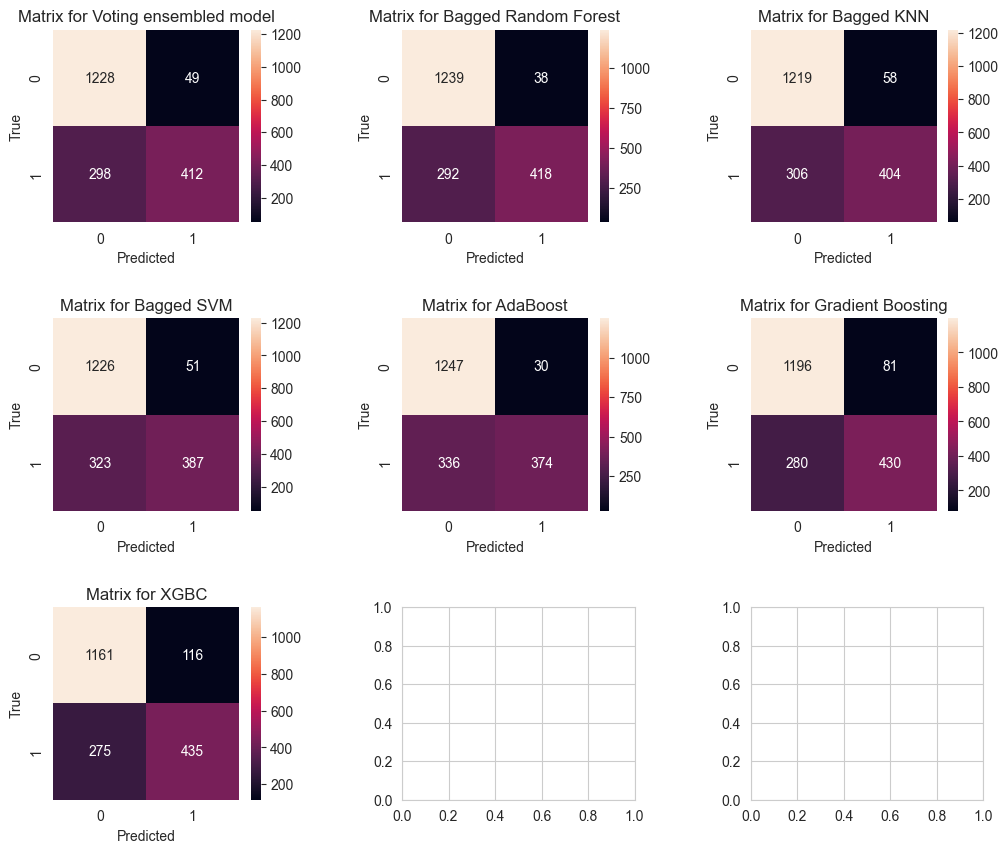

<IPython.core.display.Javascript object>

In [67]:
# Create subplots
n_classifiers = len(models)
n_rows = (n_classifiers + 2) // 3  # Determine the number of rows
n_cols = min(n_classifiers, 3)  # Limit to a maximum of 3 columns
f, ax = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Loop through classifiers
for i, clf in enumerate(models):
    # Predict using cross-validation
    y_pred = cross_val_predict(clf, X, y, cv=5)

    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Create a heatmap for the confusion matrix with labels
    row_idx = i // n_cols
    col_idx = i % n_cols
    sns.heatmap(cm, ax=ax[row_idx, col_idx], annot=True, fmt="2.0f")
    ax[row_idx, col_idx].set_title(f"Matrix for {classifiers[i]}")

    # Add labels for the axes
    ax[row_idx, col_idx].set_xlabel("Predicted")
    ax[row_idx, col_idx].set_ylabel("True")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

## Best boosting model ada boost hyper parameters tuning 

In [68]:
scorer = make_scorer(precision_score, average="macro")

n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {"n_estimators": n_estimators, "learning_rate": learn_rate}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=hyper,
    verbose=True,
    scoring=scorer,
    n_jobs=-1,  # Use all available CPU cores for parallel processing
)

grid_search.fit(X, y)

print("Best Precision Macro Score:", grid_search.best_score_)
print("Best Estimator for Precision Macro:")
print(grid_search.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Precision Macro Score: 0.8565976632808994
Best Estimator for Precision Macro:
AdaBoostClassifier(learning_rate=0.9, n_estimators=100)


<IPython.core.display.Javascript object>

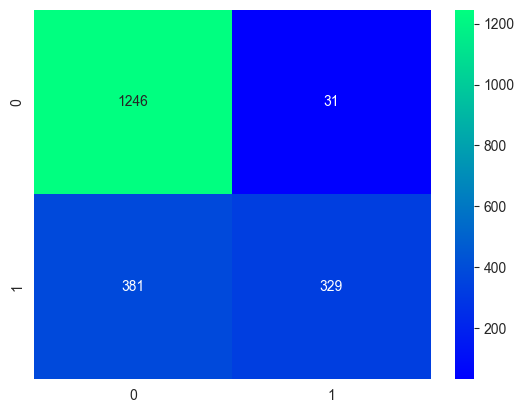

<IPython.core.display.Javascript object>

In [87]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, y, cv=5)
sns.heatmap(confusion_matrix(y, result), cmap="winter", annot=True, fmt="2.0f")
plt.show()

After hyper parameters tuning , models precision macro has increased slightly

Now AdaBoost shows third best performance 

### Four best performing models that we have found 

* XBC Classifier from TPOT with precision macro of : 0.866486		
* Bagged Random Forest : 0.860943
* Ada Boost : 0.8565976
* Random Forest	0.855689

## Feature importances by Four best performing models

In [ ]:
XGBClassifier(
        learning_rate=0.1,
        max_depth=3,
        min_child_weight=2,
        n_estimators=100,
        n_jobs=1,
        subsample=0.9000000000000001,
        verbosity=0,
    ),
 RandomForestClassifier(
        max_depth=50,
        min_samples_leaf=3,
        min_samples_split=10,
        n_estimators=136,
        random_state=0,
    ),


Text(0.5, 1.0, 'Feature Importance in Bagged Random Forest')

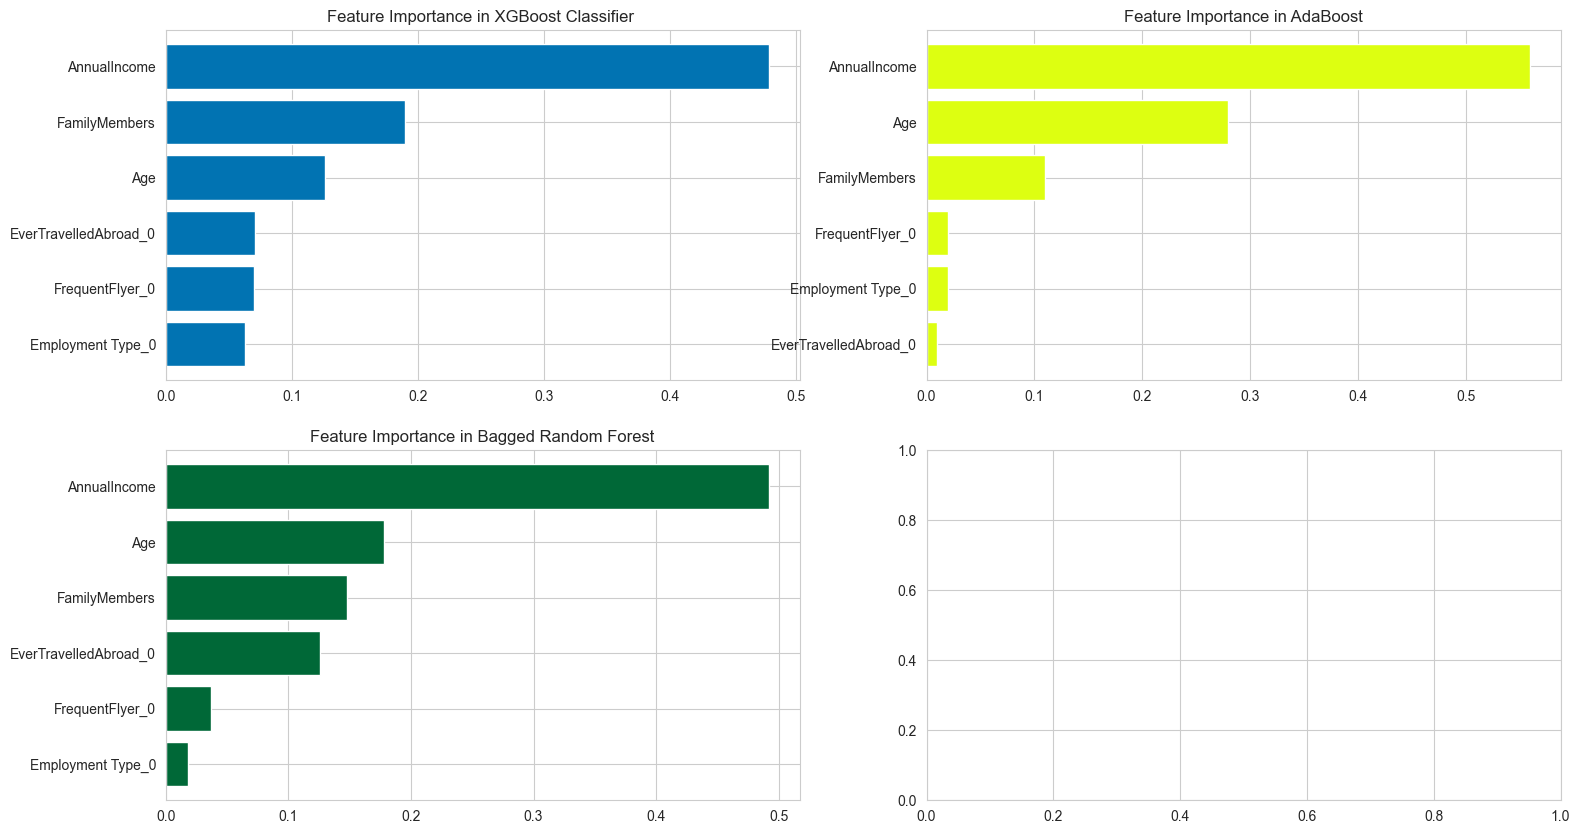

<IPython.core.display.Javascript object>

In [96]:
f, ax = plt.subplots(2, 2, figsize=(18, 10))
modelXGBC = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=2,
    n_estimators=100,
    n_jobs=1,
    subsample=0.9000000000000001,
    verbosity=0,
)
modelXGBC.fit(X, y)
pd.Series(modelXGBC.feature_importances_, X.columns).sort_values(
    ascending=True
).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title("Feature Importance in XGBoost Classifier ")
ada = AdaBoostClassifier(learning_rate=0.9, n_estimators=100)
ada.fit(X, y)
pd.Series(ada.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(
    width=0.8, ax=ax[0, 1], color="#ddff11"
)
ax[0, 1].set_title("Feature Importance in AdaBoost")
modelBRF = RandomForestClassifier(
    max_depth=50,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=136,
    random_state=0,
)
modelBRF.fit(X, y)
pd.Series(modelBRF.feature_importances_, X.columns).sort_values(
    ascending=True
).plot.barh(width=0.8, ax=ax[1, 0], cmap="RdYlGn_r")
ax[1, 0].set_title("Feature Importance in Bagged Random Forest")

By feature importances of top models we see that most important factor when predicting possible travel insurance client is : Annual income

Second most important feature is between  Family members and Age features

Some of the common important features are Ever traveled abroad , Frequent flyer and Employment type.

# Conclusion

This data science project evaluated the effectiveness of machine learning models in predicting which customers would be interested in purchasing travel insurance. The project found that the most important factor in predicting travel insurance purchase is annual income. Other important factors include family members, age, ever traveled abroad, frequent flyer, and employment type.

The project also evaluated the performance of several machine learning models, Four best performing models are XGB Classifier, Bagged Random Forest, Ada Boost, and Random Forest. The best performing model was XGB Classifier with a macro precision of 0.866486. This means that the model is able to correctly predict which customers are likely to buy travel insurance 86.65% of the time.

The findings of this project can be used by tour and travel companies to better target their marketing efforts for travel insurance. By identifying the most important factors that influence customers to purchase travel insurance and using a machine learning model to predict which customers are likely to buy it, companies can increase their sales and profitability.

Business Implications

The findings of this project have several important implications for tour and travel companies. First, the project identifies the most important factors that influence customers to purchase travel insurance. This information can be used by companies to develop more targeted marketing campaigns. For example, companies can target their marketing efforts to customers with high annual incomes, families, and frequent flyers.

Second, the project develops a machine learning model that can predict which customers are likely to buy travel insurance with high precision. This model can be used by companies to identify potential customers and prioritize their sales efforts. For example, companies can use the model to generate a list of potential customers who are most likely to be interested in travel insurance.

Overall, the findings of this project can help tour and travel companies to increase their sales and profitability of travel insurance.

## Things that can be improved 
* Could be gathered more data  , with features included like Sex . which could maybe give us more insights 
* Bigger variety of people, because in dataset are only people from 25 to 35 , it would maybe give us more insights.
* More precise feature engineering could be done